LIBRARY

In [38]:
import torch 
import numpy as np 
import torchvision
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt
import json

In [2]:
print("Torch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)

Torch version: 2.3.0+cpu
Torchvision version: 0.18.0+cpu


In [3]:
use_pretrained = True # tải mô hình đã được huấn luyện trước trên ImageNet
net = models.vgg16(pretrained=use_pretrained) # sử dụng mô hình VGG16
net.eval() # chuyển mô hình sang chế độ đánh giá (evaluation mode)
print(net) # in cấu trúc mô hình

d:\Python\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
d:\Python\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to C:\Users\DELL/.cache\torch\hub\checkpoints\vgg16-397923af.pth
100%|██████████| 528M/528M [04:49<00:00, 1.91MB/s] 


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [33]:
class BaseTransform():
    def __init__(self, resize, mean, std):
        self.base_transform = transforms.Compose([
            transforms.Resize(resize), # thay đổi kích thước ảnh
            transforms.CenterCrop(resize), # cắt ảnh ở giữa
            transforms.ToTensor(), # chuyển ảnh sang tensor
            transforms.Normalize(mean, std) # chuẩn hóa ảnh về dạng tiêu chuẩn (mean, std)
        ])
    def __call__(self, img):
        return self.base_transform(img)

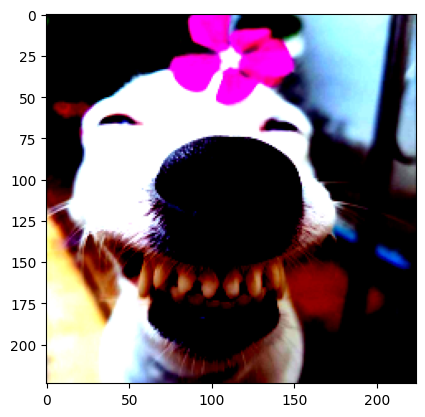

In [37]:
image_file_path = "./data/7817abbc472d8b0af9585fe29f99e12d (1).jpg"
img = Image.open(image_file_path) # mở ảnh
plt.imshow(img) # hiển thị ảnh

resize = 224 # kích thước ảnh đầu vào của mô hình VGG16
mean = (0.485, 0.456, 0.406) # giá trị trung bình của tập ImageNet
std = (0.229, 0.224, 0.225) # độ lệch chuẩn của tập ImageNet
transform = BaseTransform(resize, mean, std) # khởi tạo lớp biến đổi ảnh
img_transformed = transform(img) # biến đổi ảnh của mình
#(channels, height, width) -> (height, width, channels) 
#clip giá trị về [0, 1] để hiển thị ảnh
img_transformed = img_transformed.numpy().transpose((1, 2, 0))# chuyển đổi định dạng tensor sang numpy và thay đổi thứ tự kênh như trên cmt để hiển thị ảnh đúng
img_transformed = np.clip(img_transformed, 0, 1) # giới hạn giá trị pixel trong khoảng [0, 1] để hiển thị ảnh đúng
plt.imshow(img_transformed) # hiển thị ảnh đã biến đổi
plt.show()

In [40]:
class predictor():
    def __init__(self, index_class):
        self.index_class = index_class
    
    def predict_max(self, output): # hàm dự đoán nhãn của ảnh , output là lớp cuối cùng của mô hình VGG16
        # lấy xác suất cao nhất
        maxid = np.argmax(output.detach().numpy())    # chuyển tensor sang numpy và tách output khỏi đồ thị tính toán
        predicted_label_name = self.index_class[str(maxid)] # lấy nhãn tương ứng với xác suất cao nhất
        return maxid, predicted_label_name # trả về id và nhãn của ảnh 

In [39]:
!dir

 Volume in drive D has no label.
 Volume Serial Number is ADB7-6110

 Directory of d:\Desktop\RTC\Machine Vision\Pytorch\Pytorch

08/10/2025  09:39 AM    <DIR>          .
08/10/2025  09:39 AM    <DIR>          ..
07/10/2025  04:30 PM             5,008 4.ipynb
06/10/2025  02:00 PM                72 4.py
07/10/2025  04:47 PM             4,326 5.ipynb
08/10/2025  09:31 AM           164,017 6.ipynb
08/10/2025  09:03 AM    <DIR>          data
08/10/2025  09:39 AM            35,363 imagenet_class_index.json
06/10/2025  01:57 PM                14 README.md
               6 File(s)        208,800 bytes
               3 Dir(s)  14,546,038,784 bytes free


In [41]:
index_class = json.load(open('./imagenet_class_index.json', 'r')) # tải file json chứa nhãn của tập ImageNet

In [42]:
predictor = predictor(index_class) # khởi tạo lớp dự đoán

In [46]:
image_file_path = "./data/7817abbc472d8b0af9585fe29f99e12d (1).jpg"
img = Image.open (image_file_path)
resize = 224 # kích thước ảnh đầu vào của mô hình VGG16
mean = (0.485, 0.456, 0.406) # giá trị trung bình của tập ImageNet
std = (0.229, 0.224, 0.225) # độ lệch chuẩn của tập ImageNet
transform = BaseTransform(resize, mean, std)
img_transformed = transform(img) 
img_transformed = img_transformed.unsqueeze_(0) 
#img_transformed.shape
out = net (img_transformed)
result = predictor.predict_max(out) # out[0] vì out có dạng (1, 1000) và kết quả là nhãn cuối cùng của ảnh
print("Predicted class id:", result)

Predicted class id: (248, ['n02109961', 'Eskimo_dog'])
